In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

filename = 'agent_log_2'
vid = False

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.style.use("seaborn-v0_8")

In [16]:
df = pd.read_csv("output/" + filename + ".csv")
n = len(df["type"].unique())
colors = plt.cm.viridis(np.linspace(0, 1, n))

In [17]:
counts_per_type = []
for tp in sorted(df["type"].unique()):
    nums = []
    nums = [
        len(df[(df["tick"] == i) & (df["type"] == tp)]) for i in df["tick"].unique()
    ]
    counts_per_type.append(nums)

In [18]:
df_first = df[df["tick"] == 0]
df_last = df[df["tick"] == df["tick"].max()]
print('\t\t tick = 0', '\t tick =', df["tick"].max())
print(
    "Total:\t\t",
    len(df_first),
    '\t\t',
    len(df_last),
    '\n'
)
print('Bacteria:\t', len(df_first[df_first["type"] == 0]), '\t\t', len(df_last[df_last["type"] == 0]))
print('Fungi:\t\t', len(df_first[df_first["type"] == 1]), '\t\t', len(df_last[df_last["type"] == 1]))
print('Nematodes:\t', len(df_first[df_first["type"] == 2]), '\t\t', len(df_last[df_last["type"] == 2]))
print('Mites:\t\t', len(df_first[df_first["type"] == 3]), '\t\t', len(df_last[df_last["type"] == 3]))

		 tick = 0 	 tick = 399
Total:		 800 		 724 

Bacteria:	 200 		 0
Fungi:		 200 		 34
Nematodes:	 200 		 650
Mites:		 200 		 40


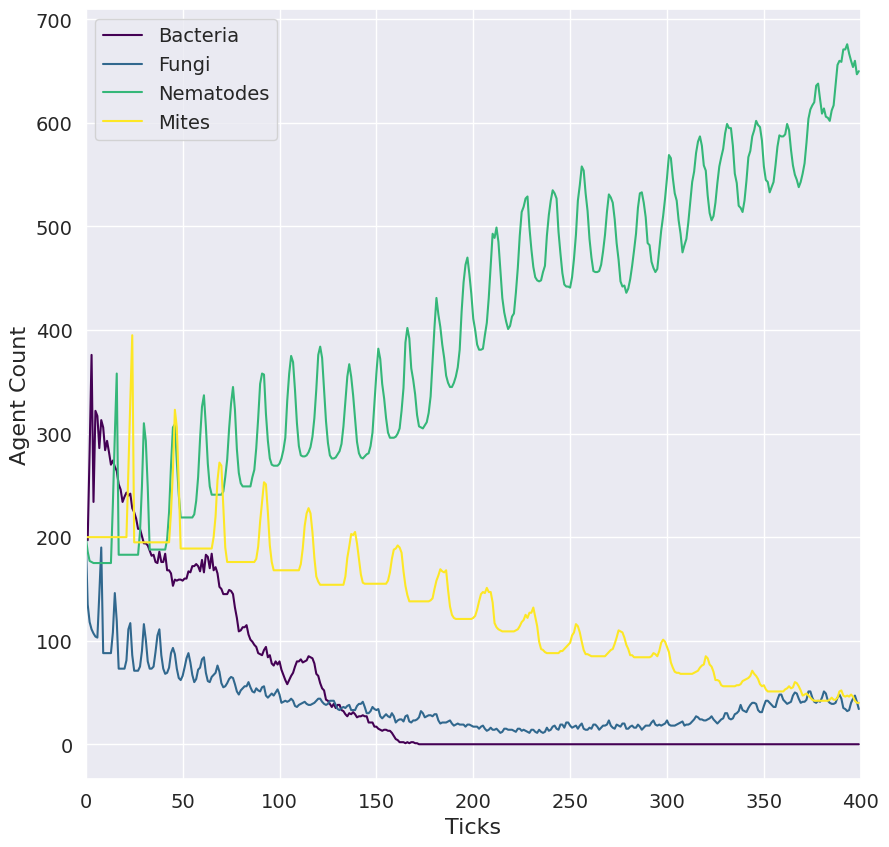

In [19]:
organism_group_labels = ["Bacteria", "Fungi", "Nematodes", "Mites"]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

for i in range(len(counts_per_type)):
    plt.plot(
        range(len(df["tick"].unique())),
        counts_per_type[i],
        label=organism_group_labels[i],
        color=colors[i]
    )
ax.set_xlim(0, 400)
ax.set_xlabel("Ticks")
ax.set_ylabel("Agent Count")

plt.legend()
plt.show()

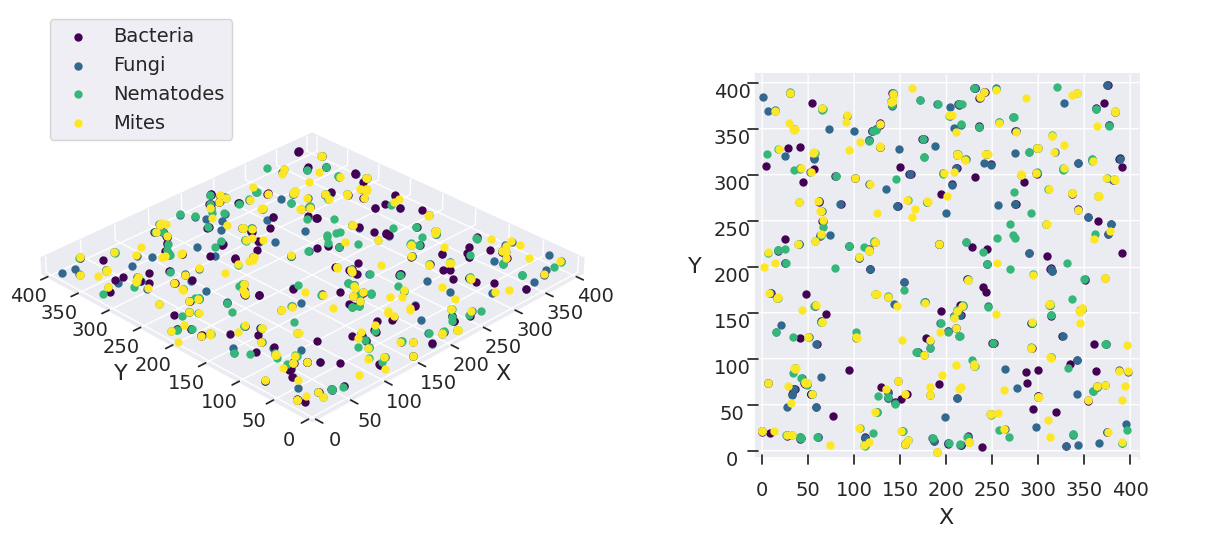

In [20]:
fig = plt.figure(figsize=(15, 15))
#plt.rcParams.update({'text.color': "black", 'axes.labelcolor': "black", 'xtick.color': "black", 'ytick.color': "black"})
ax = fig.add_subplot(1,2,1,projection="3d")
ax.view_init(30, 225)

df1 = df[df["tick"] == 0]

for g in np.unique(df1["type"]):
    ix = np.where(df1["type"] == g)
    ax.scatter(
        df1.iloc[ix]["x"],
        df1.iloc[ix]["y"],
        df1.iloc[ix]["z"],
        color=colors[g],
        label=organism_group_labels[g],
        s=25,
        depthshade=False
    )

ax.set_xlim(0, 400)
ax.set_ylim(0, 400)
ax.set_zlim(0, 20)

ax.legend(loc='upper left')
ax.set_xlabel("X", labelpad=12)
ax.set_ylabel("Y", labelpad=12)
ax.set_zticks([])

ax.xaxis.set_pane_color((0.92, 0.92, 0.95, 1.0))
ax.yaxis.set_pane_color((0.92, 0.92, 0.95, 1.0))
ax.zaxis.set_pane_color((0.92, 0.92, 0.95, 1.0))
ax.set_facecolor("white")
ax.set_aspect('equal')


#plt.rcParams.update({'text.color': "black", 'axes.labelcolor': "black", 'xtick.color': "black", 'ytick.color': "black"})
ax = fig.add_subplot(1,2,2,projection="3d")
ax.view_init(30, 225)

df1 = df[df["tick"] == 0]

for g in np.unique(df1["type"]):
    ix = np.where(df1["type"] == g)
    ax.scatter(
        df1.iloc[ix]["x"],
        df1.iloc[ix]["y"],
        df1.iloc[ix]["z"],
        color=colors[g],
        label=organism_group_labels[g],
        s=25,
        depthshade=False
    )
    
ax.view_init(90,270)
ax.set_aspect('equal')

ax.set_xlim(0, 400)
ax.set_ylim(0, 400)
ax.set_zlim(0, 20)

ax.set_xlabel("X", labelpad=10)
ax.set_ylabel("Y", labelpad=10)
ax.set_zticks([])

ax.xaxis.set_pane_color((0.92, 0.92, 0.95, 1.0))
ax.yaxis.set_pane_color((0.92, 0.92, 0.95, 1.0))
ax.zaxis.set_pane_color((0.92, 0.92, 0.95, 1.0))
ax.set_facecolor("white")

plt.show()


plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


def update(t):
    ax.cla()
    data = df[df["tick"] == t]

    for g in np.unique(data["type"]):
        ix = np.where(data["type"] == g)
        ax.scatter(
            data.iloc[ix]["x"],
            data.iloc[ix]["y"],
            data.iloc[ix]["z"],
            color=colors[g],
            label=organism_group_labels[g],
            s=25 * (g+1),
        )

    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 20)

    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")


if vid:
    plt.style.use("ggplot")
    fig = plt.figure(figsize=(10, 10), dpi=150)
    ax = fig.add_subplot(projection="3d")
    ax.view_init(30, 225)
    ax.set_facecolor("white")

    ani = FuncAnimation(fig=fig, func=update, frames=df["tick"].max(), interval=100)

    ani.save("viz/" + filename + ".mp4")

    plt.show()